<a href="https://colab.research.google.com/github/Abhi-1441/ML-Lab-Assignments/blob/main/Assg6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = pd.read_csv('Datasets/web-page-phishing.csv')
print(data)
print(data.ndim)
print(data.shape)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

        url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0               37       3         0            0        0               0   
1               77       1         0            0        0               0   
2              126       4         1            2        0               1   
3               18       2         0            0        0               0   
4               55       2         2            0        0               0   
...            ...     ...       ...          ...      ...             ...   
100072          23       3         1            0        0               0   
100073          34       2         0            0        0               0   
100074          70       2         1            0        5               0   
100075          28       2         0            0        1               0   
100076          16       2         0            0        0               0   

        n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  

In [ ]:
print(y.shape)

(100077,)


In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 457us/step - accuracy: 0.8866 - loss: 0.2562
Epoch 2/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 474us/step - accuracy: 0.8852 - loss: 0.2543
Epoch 3/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 462us/step - accuracy: 0.8859 - loss: 0.2561
Epoch 4/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 453us/step - accuracy: 0.8857 - loss: 0.2577
Epoch 5/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 453us/step - accuracy: 0.8866 - loss: 0.2580
Epoch 6/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 457us/step - accuracy: 0.8860 - loss: 0.2566
Epoch 7/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 462us/step - accuracy: 0.8857 - loss: 0.2565
Epoch 8/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 486us/step - accuracy: 0.8851 - loss: 0.2592
Epoch 9/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 470us/step - accuracy: 0.8844 - loss: 0.2563
Epoch 10/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 461us/step - accuracy: 0.8849 - loss: 0.2574
Epoch 11/50
10008/10008 ━━━━━━━━━━━━━━━━━━━━ 5s 460us/step - accuracy: 0.8833 -

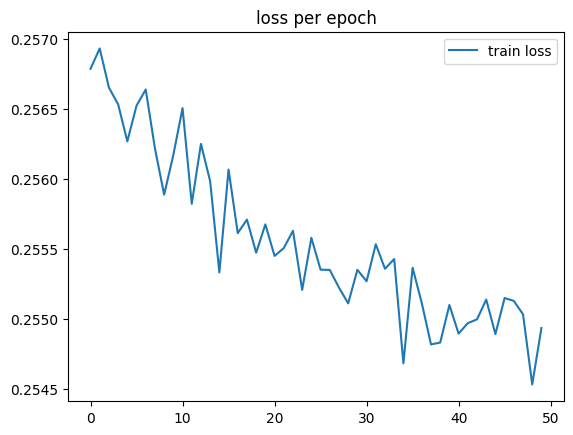

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.title('loss per epoch')
plt.show()

In [ ]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

3128/3128 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.8463 - loss: 0.3293
loss: 25.19%
compile_metrics: 88.77%


In [ ]:
prediction = model.predict(X)
rounded = [round(x[0]) for x in prediction]

3128/3128 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step


In [ ]:
for i in range(data.shape[0]):
    print("%s => %d (expected %d)" % (X.iloc[i].tolist(), prediction[i], y.iloc[i]))

[37, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[77, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 1)
[126, 4, 1, 2, 0, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 1)
[18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 0)
[55, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 0)
[32, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 1)
[19, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 0)
[81, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 1)
[42, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[104, 1, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[56, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[43, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[83, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[33, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 1)
[7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 0)
[20, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[41, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[38, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 1)
[10, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 0)
[35, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 1)
[39, 2, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 1)
[18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 0 (expected 0)
[31, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[24, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
[32, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 1)
[17, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 0 (expected 0)
